In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus




warnings.filterwarnings("ignore")

In [2]:
stroke_df = pd.read_csv("healthcare-dataset-stroke-data.csv", sep=",")
stroke_df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [3]:
stroke_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


### Quitar La columna id del conjunto de datos 

In [4]:
del stroke_df['id']

### Descripción estadistica básica del conjunto de datos

solo se realiza de las columnas que son numéricas

In [5]:
stroke_df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


### Organizar los datos, para quitar un dato raro en el gender

In [6]:
stroke_df.groupby('gender').size()

gender
Female    2994
Male      2115
Other        1
dtype: int64

In [7]:
stroke_df = stroke_df[stroke_df["gender"] != "Other"]
stroke_df.groupby('gender').size()

gender
Female    2994
Male      2115
dtype: int64

Se convierte el genero 0 = Male ; 1 = Female

In [8]:
stroke_df['gender'] = (stroke_df['gender']=="Female").astype(int)
stroke_df.groupby('gender').size() 

gender
0    2115
1    2994
dtype: int64

### Se realiza el mismo cambio con ever married

In [9]:
stroke_df.groupby('ever_married').size()

ever_married
No     1756
Yes    3353
dtype: int64

Se convierte el Yes = 1 y el No = *0*

In [10]:
stroke_df['ever_married'] = (stroke_df['ever_married']=="Yes").astype(int)
stroke_df.groupby('ever_married').size() 

ever_married
0    1756
1    3353
dtype: int64

### Se realiza el mismo cambio con Residence type

In [11]:
stroke_df.groupby('Residence_type').size()

Residence_type
Rural    2513
Urban    2596
dtype: int64

Se convierte el Rural = 1 y el Urban = *0*

In [12]:
stroke_df['Residence_type'] = (stroke_df['Residence_type']=="Rural").astype(int)
stroke_df.groupby('Residence_type').size() 

Residence_type
0    2596
1    2513
dtype: int64

### Revisar si existen datos faltantes

<AxesSubplot:>

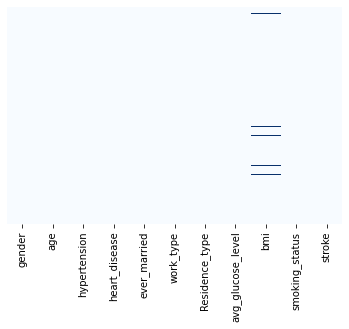

In [13]:
sns.heatmap(stroke_df.isnull(), yticklabels=False, cbar = False, cmap = "Blues")

### reemplazando los NaN por cero


In [14]:
stroke_df["bmi"] = stroke_df["bmi"].fillna(0)


## Análisis Estadistico

In [15]:
stroke_df.groupby('stroke').mean()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi
stroke,,,,,,,,
0,0.587037,41.974831,0.088889,0.047119,0.644650,0.493621,104.787584,27.869547
1,0.566265,67.728193,0.265060,0.188755,0.883534,0.457831,132.544739,25.576305


### Fumador

Se puede evidenciar los promedios diferenciados en los casos que tienen la enfermedad y los que no. en la columna de edad, se puede ver que los que que tienen la enfermedad tiene en promedio una dead mayor, por lo que puede ser una variable immportante a la hora de seleccionar, de igualmente se puede ver lo mismo con las columnas de hipertensión, enfermedades del corazón, si se ha casado y promedio de grucosa en la sangre, pero por otra parte, se puede que el tipo de residencia no tiene gran diferencia entre los que tienen la enfermedad o los que no, por lo que esta puede ser una columna que no sea importante para el modelo. 

Text(0, 0.5, 'Frecuencía de Enfermar')

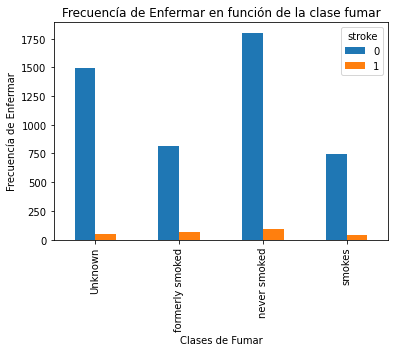

In [16]:
pd.crosstab(stroke_df.smoking_status, stroke_df.stroke).plot(kind="bar")
plt.title("Frecuencía de Enfermar en función de la clase fumar")
plt.xlabel("Clases de Fumar")
plt.ylabel("Frecuencía de Enfermar")

En la gráfica se puede ver, que entre las cuatro clases que tiene la columna de fumador, la clase de nunca ha fumado es la que más personas con enfermeda tiene, por lo que se puede entender que no fumar ayuda a que haya más ataque celebro vasculares, pero esto puede ser un mal entendido, ya que está en valore totales, si se pasa a valores relativos en cada conjunto, el resultado puede ser diferente. 

Text(0, 0.5, 'Proporción de enfermos')

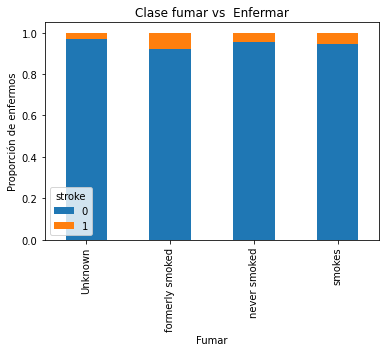

In [17]:
table = pd.crosstab(stroke_df.smoking_status, stroke_df.stroke)
table.div(table.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.title("Clase fumar vs  Enfermar")
plt.xlabel("Fumar")
plt.ylabel("Proporción de enfermos")

Después de ver la gráfica anterior, en valores relativos o percentuales, se puede ver que entre los que son formalmente fumadores, tienen el mayor porcentaje de ataques cardiovasculares. 

### Trabajo

Text(0, 0.5, 'Proporción de enfermos')

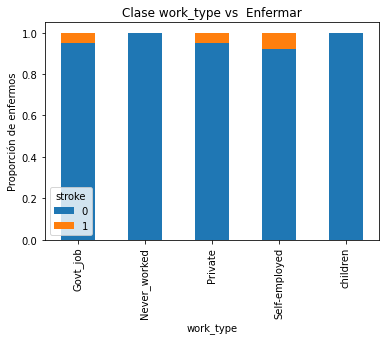

In [18]:
table = pd.crosstab(stroke_df.work_type, stroke_df.stroke)
table.div(table.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.title("Clase work_type vs  Enfermar")
plt.xlabel("work_type")
plt.ylabel("Proporción de enfermos")

Se puede evidenciar que los que nunca han trabajado o son niños, no tienen ataques, por lo que se puede tener en cuenta que los que trabajan, tienen más probabilidad de ataques.


### Edad

Text(0, 0.5, 'Frecuencia de enfermar')

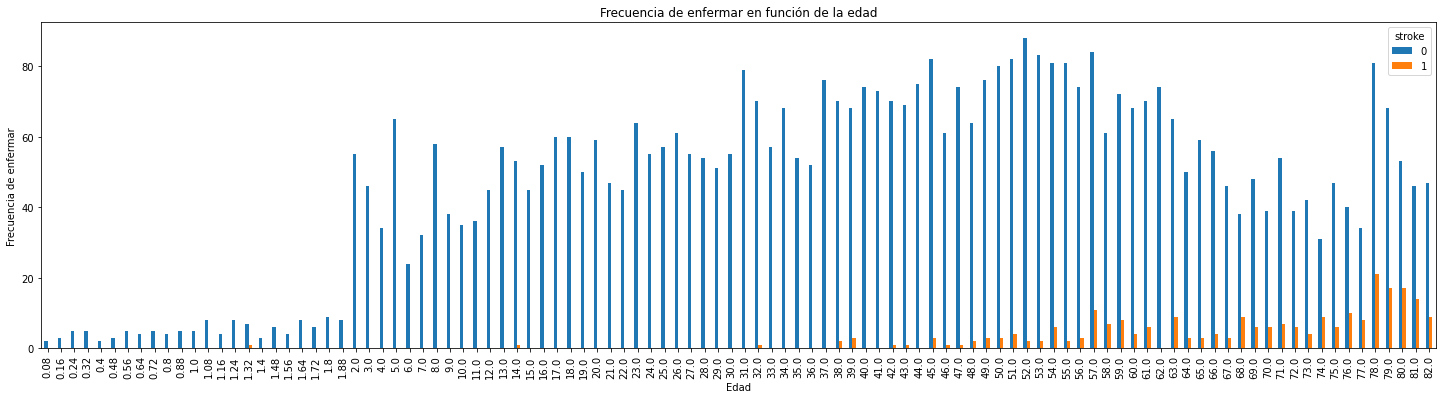

In [19]:
plt.rcParams['figure.figsize'] = (25,6)
pd.crosstab(stroke_df.age, stroke_df.stroke).plot(kind="bar")
plt.title("Frecuencia de enfermar en función de la edad")
plt.xlabel("Edad")
plt.ylabel("Frecuencia de enfermar")

Se puede ver que entre mayor avanza la edad, es mayor la cantidad de ataques cerebro vasculares, y rectificamos lo que vimos en el promedio de edad agrupado en los dos grandes grupos. 

### Enfermedades del corazón

Text(0, 0.5, 'Frecuencia de enfermar')

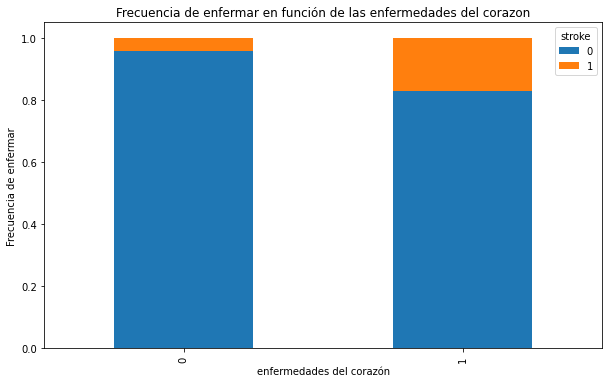

In [20]:
plt.rcParams['figure.figsize'] = (10,6)
table = pd.crosstab(stroke_df.heart_disease, stroke_df.stroke)
table.div(table.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.title("Frecuencia de enfermar en función de las enfermedades del corazon")
plt.xlabel("enfermedades del corazón")
plt.ylabel("Frecuencia de enfermar")

Se puede envidenciar que es mayor el grupo de personas con ataques cuando han tenido alguna enfermedad del corazón

### Hipertensión

Text(0, 0.5, 'Frecuencia de enfermar')

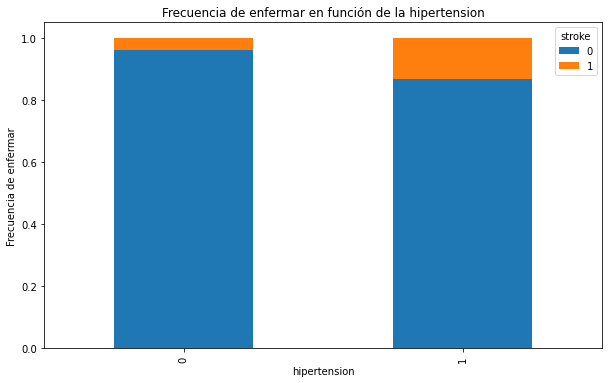

In [21]:
table = pd.crosstab(stroke_df.hypertension, stroke_df.stroke)
table.div(table.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.title("Frecuencia de enfermar en función de la hipertension")
plt.xlabel("hipertension")
plt.ylabel("Frecuencia de enfermar")

### si se ha casado 

Text(0, 0.5, 'Frecuencia de enfermar')

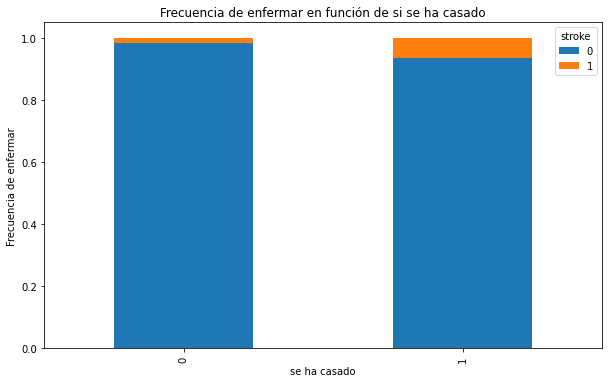

In [22]:
table = pd.crosstab(stroke_df.ever_married, stroke_df.stroke)
table.div(table.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.title("Frecuencia de enfermar en función de si se ha casado")
plt.xlabel("se ha casado")
plt.ylabel("Frecuencia de enfermar")

### tipo de vivienda

Text(0, 0.5, 'Frecuencia de enfermar')

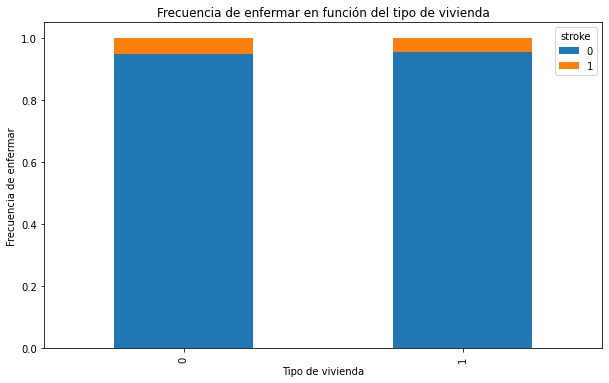

In [23]:
table = pd.crosstab(stroke_df.Residence_type, stroke_df.stroke)
table.div(table.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.title("Frecuencia de enfermar en función del tipo de vivienda")
plt.xlabel("Tipo de vivienda")
plt.ylabel("Frecuencia de enfermar")

Se rectifica lo que de dijo arriba, que el tipo de vivienda no tiene tanto peso por sí sola para la toma de la decisión.

## Preparando el conjunto de datos

Se convierte a variable dummy, para que los modelos puedan trabajar con categorias

In [24]:
categories = ["work_type", "smoking_status" ]

for category in categories:
  cat_list = "cat" + "_"+category
  cat_dummies = pd.get_dummies(stroke_df[category], prefix=cat_list)
  stroke_df = stroke_df.join(cat_dummies)
  stroke_df.columns.values

Eliminamos las variables originales que se convirtieron a dummies

In [25]:
data_vars = stroke_df.columns.values.tolist()
to_keep = [v for v in data_vars if v not in categories]
stroke_data = stroke_df[to_keep]
stroke_data.columns.values

array(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'Residence_type', 'avg_glucose_level', 'bmi', 'stroke',
       'cat_work_type_Govt_job', 'cat_work_type_Never_worked',
       'cat_work_type_Private', 'cat_work_type_Self-employed',
       'cat_work_type_children', 'cat_smoking_status_Unknown',
       'cat_smoking_status_formerly smoked',
       'cat_smoking_status_never smoked', 'cat_smoking_status_smokes'],
      dtype=object)

Se separa en dos conjuntos, uno con la variable objetivo y otro con todos los datos. 

In [26]:
stroke_df_var=stroke_data.columns.values.tolist()
var_Y = ['stroke']
var_X = [v for v in stroke_df_var if v not in var_Y]
y = stroke_data['stroke']
X = stroke_data[var_X]

Se separa en el conjunto de entrenamiento y de test

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

## Regresión Lineal

In [28]:
reg = LinearRegression().fit(X_train, y_train)


[0 0 0 ... 0 0 0]
0.9442270058708415
0.05577299412915848
[0.98459959 0.125     ]


Text(0.5, 33.0, 'Predicted label\naccuracy=0.944; misclass=0.056; recall clase yes =0.985; recall clase no =0.125')

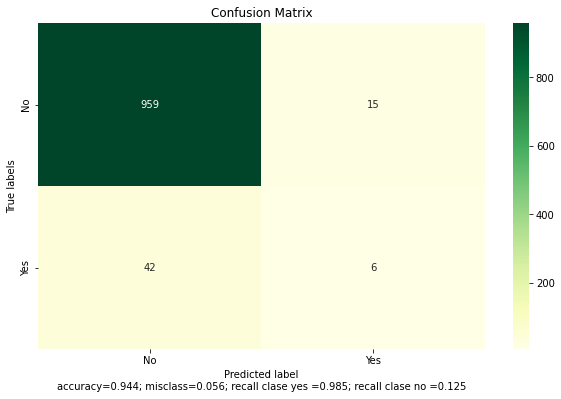

In [29]:
y_pred = np.where(reg.predict(X_test)> 0.20, 1, 0) # punto de corte en 0,2
print(y_pred)
cm = confusion_matrix(y_test, y_pred)
accuracy = np.trace(cm) / float(np.sum(cm))
misclass = 1 - accuracy
recall = recall_score(y_test, y_pred, average=None)
print(accuracy)
print(misclass)
print(recall)

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='.4g', ax=ax, cmap="YlGn"); 

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['No', 'Yes']); ax.yaxis.set_ticklabels(['No', 'Yes']);
plt.xlabel('Predicted label\naccuracy={:0.3f}; misclass={:0.3f}; recall clase yes ={:0.3f}; recall clase no ={:0.3f}'.format(accuracy, misclass,recall[0],recall[1]))

In [30]:
report = classification_report(y_test, y_pred, output_dict=True)
report_lineal = pd.DataFrame(report).transpose()
report_lineal

,precision,recall,f1-score,support
0,0.958042,0.984600,0.971139,974.000000
1,0.285714,0.125000,0.173913,48.000000
accuracy,0.944227,0.944227,0.944227,0.944227
macro avg,0.621878,0.554800,0.572526,1022.000000
weighted avg,0.926465,0.944227,0.933696,1022.000000


## Regresión Logistica

In [31]:
model_log = LogisticRegression( fit_intercept=True)
model_log.fit(X_train, y_train)

y_pred_log = model_log.predict(X_test)

Accuracy 95.30332681017613 %
0.9530332681017613
0.046966731898238745
[0.98459959 0.125     ]


Text(0.5, 33.0, 'Predicted label\naccuracy=0.953; misclass=0.047; recall clase yes =0.985; recall clase no =0.125')

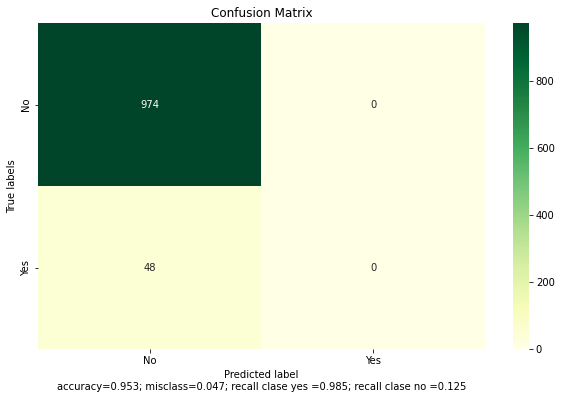

In [32]:
print("Accuracy {} %".format(100*accuracy_score(y_pred_log, y_test)))
cm = confusion_matrix( y_test, y_pred_log)

accuracy = np.trace(cm) / float(np.sum(cm))
misclass = 1 - accuracy
recall = recall_score(y_test, y_pred, average=None)
print(accuracy)
print(misclass)
print(recall)

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='.4g', ax=ax, cmap="YlGn"); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['No', 'Yes']); ax.yaxis.set_ticklabels(['No', 'Yes']);
plt.xlabel('Predicted label\naccuracy={:0.3f}; misclass={:0.3f}; recall clase yes ={:0.3f}; recall clase no ={:0.3f}'.format(accuracy, misclass,recall[0],recall[1]))

In [33]:
report = classification_report(y_test, y_pred_log, output_dict=True)
report_log = pd.DataFrame(report).transpose()
report_log

,precision,recall,f1-score,support
0,0.953033,1.000000,0.975952,974.000000
1,0.000000,0.000000,0.000000,48.000000
accuracy,0.953033,0.953033,0.953033,0.953033
macro avg,0.476517,0.500000,0.487976,1022.000000
weighted avg,0.908272,0.953033,0.930115,1022.000000


## Arbol de decisión

In [37]:
stroke_tree = DecisionTreeClassifier(criterion="gini", min_samples_split=20, max_depth=10)
stroke_tree.fit(X_train, y_train)
varImpList= []
for name, importance in zip(var_X, stroke_tree.feature_importances_):  
    temp = [name, importance*100]
    varImpList.append(temp)
y_pred_tree = stroke_tree.predict(X_test)
importance_df = pd.DataFrame(varImpList, columns = ['Variable', 'Importancia'])
importancia_variable= importance_df.sort_values('Importancia', ascending = False)
importancia_variable.head(15)

,Variable,Importancia
6,avg_glucose_level,32.910456
1,age,29.053581
7,bmi,27.015678
2,hypertension,4.336156
13,cat_smoking_status_Unknown,2.403690
3,heart_disease,1.140750
4,ever_married,1.016398
5,Residence_type,0.865995
15,cat_smoking_status_never smoked,0.656559
11,cat_work_type_Self-employed,0.407946


se puede ver que hay variables muy importantes a la hora de clasificación y otras que no, por lo que se pueden eliminar variables para simplificar el modelo

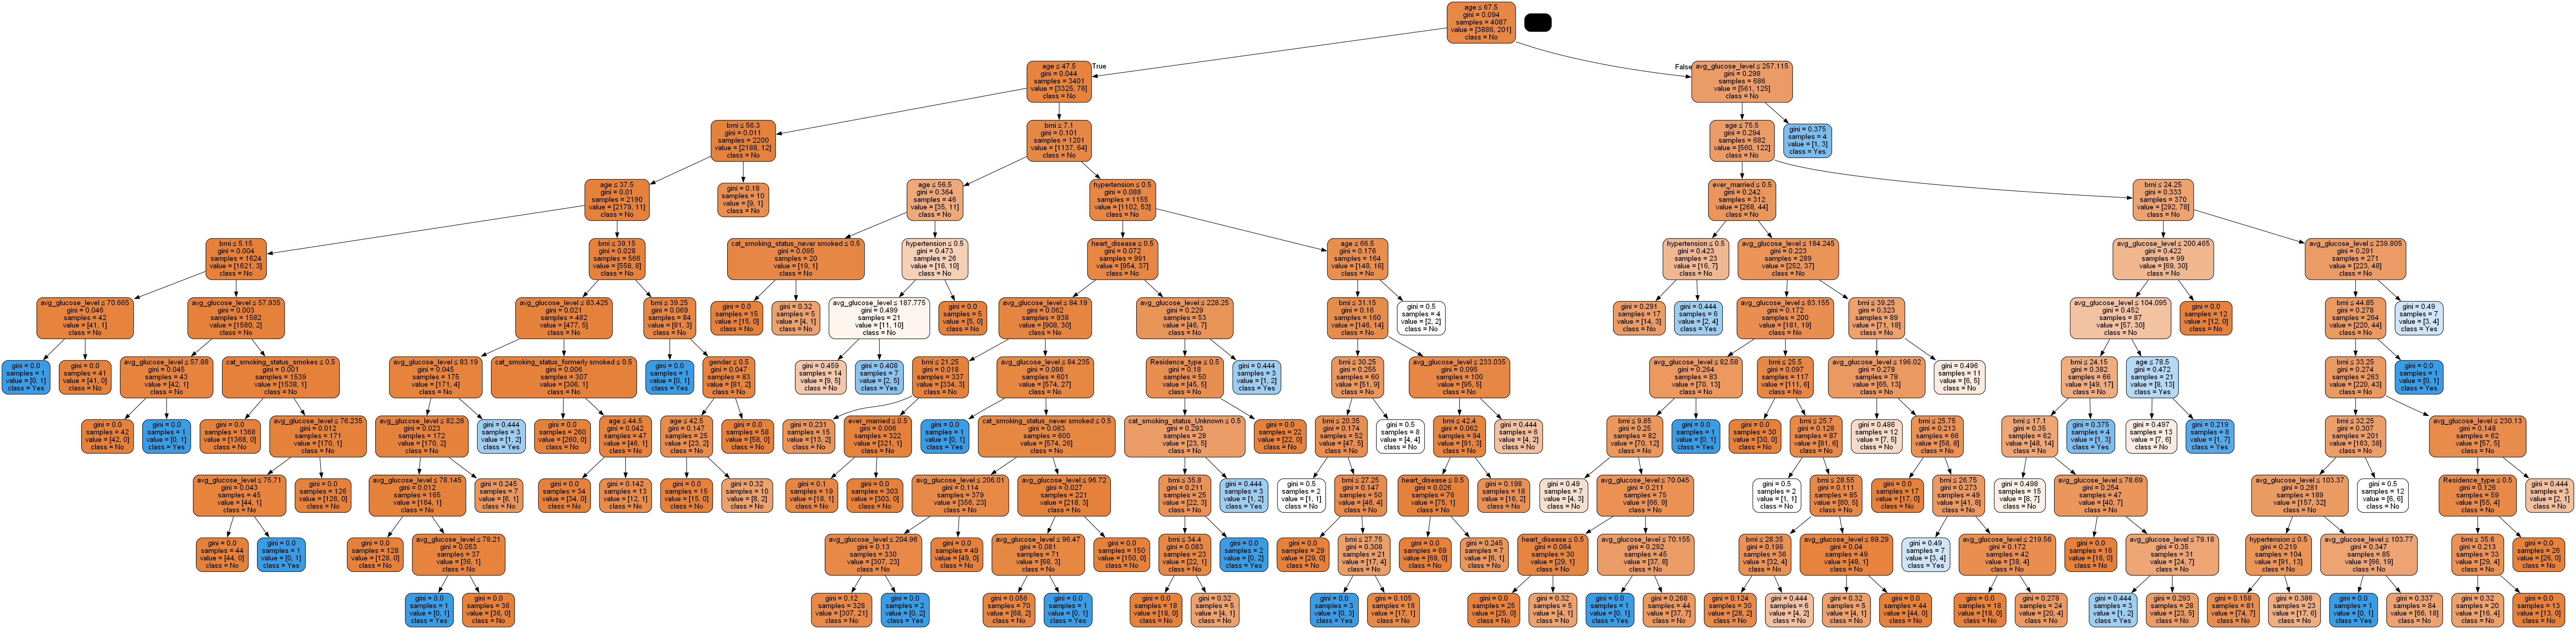

In [36]:
dot_data = StringIO()
export_graphviz(stroke_tree, out_file = dot_data,  
                filled = True, rounded = True,
                special_characters = True, feature_names=var_X, class_names = ['No', 'Yes'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

Accuracy 93.05283757338552 %
0.9305283757338552
0.06947162426614484
[0.98459959 0.125     ]


Text(0.5, 33.0, 'Predicted label\naccuracy=0.931; misclass=0.069; recall clase yes =0.985; recall clase no =0.125')

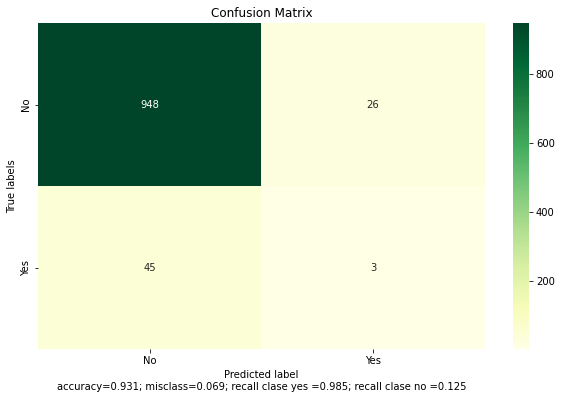

In [38]:
print("Accuracy {} %".format(100*accuracy_score(y_pred_tree, y_test)))
cm = confusion_matrix( y_test, y_pred_tree)

accuracy = np.trace(cm) / float(np.sum(cm))
misclass = 1 - accuracy
recall = recall_score(y_test, y_pred, average=None)
print(accuracy)
print(misclass)
print(recall)

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='.4g', ax=ax, cmap="YlGn"); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['No', 'Yes']); ax.yaxis.set_ticklabels(['No', 'Yes']);
plt.xlabel('Predicted label\naccuracy={:0.3f}; misclass={:0.3f}; recall clase yes ={:0.3f}; recall clase no ={:0.3f}'.format(accuracy, misclass,recall[0],recall[1]))

In [39]:
report = classification_report(y_test, y_pred_tree, output_dict=True)
report_tree = pd.DataFrame(report).transpose()
report_tree

,precision,recall,f1-score,support
0,0.954683,0.973306,0.963904,974.000000
1,0.103448,0.062500,0.077922,48.000000
accuracy,0.930528,0.930528,0.930528,0.930528
macro avg,0.529066,0.517903,0.520913,1022.000000
weighted avg,0.914703,0.930528,0.922293,1022.000000


Por ahora el mejor modelo es el modelo de regresión líneal, con un punto de corte en 0,2